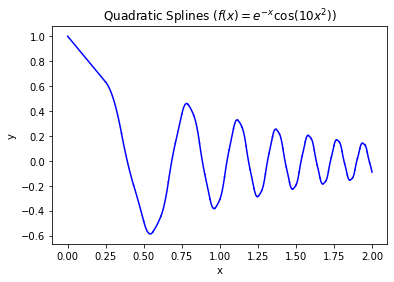

0.5772112825121349


In [3]:
import numpy as np
import matplotlib.pyplot as plt 

np.set_printoptions(suppress=True)

##Matrix in form AB = C  


##define function to calculate the value of y
def fn(x):
    return np.exp(-x) * np.cos(10*x**2) #np.sin(x) 

###INitializations

#Create vector x
x = np.sqrt(np.arange(0, 64.001)/16)#64.001 #np.sqrt(np.arange(0,32.001)/8) ##NOTE SMALL x HERE


## define N as the length of x
N = len(x)

#define n as the number of quadratic splines
#There are n splines, each having 3 unknowns:total 3n unknowns
#Therefore, we need 3n equations in order to solve for
n = N-1 ##n = 32

#Create Matrix A
A = np.zeros((3*n, 3*n))*1.0

#Create vector C
C = np.zeros(3*n)*1.0


#
for i in range(n):
    A[i,i] = x[i]**2
    A[i,n+i] = x[i]
    A[i,2*n+i] = 1
    
    #Rows n to 2n-1
    A[n+i, i] = x[i+1]**2
    A[n+i, n+i] = x[i+1]
    A[n+i, 2*n+i] = 1
    
    C[i] = fn(x[i])
    C[n+i] = fn(x[i+1])


    ###Rows 2n: 3n-1
for j in range(n-1): 
    A[2*n+j, [j, j+1, n+j, n+j+1]] = 2*x[j+1], -2*x[j+1], 1, -1
    
    ##C[2n+j] = 0 #ALREADY ZERO

#In final row set a1 = 1    
A[3*n -1, 0] = 1

##Solve for vector b
B = np.linalg.solve(A,C)
#B_ = np.dot(np.linalg.inv(A), C)

ai = B[:n]
bi = B[n:2*n]
ci = B[2*n:]


plt.figure()

for k in range(n):
    xspline = np.linspace(x[k], x[k+1], 100)
    yspline = ai[k]*xspline**2 + bi[k]*xspline + ci[k]
    
    plt.plot(xspline, yspline, 'b-')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Splines ($f(x) = e^{-x}\cos(10x^{2})$)')

plt.show()




##############5b
        
###5b
result = 0

for t in range(n):
    upper_lim = (ai[t]*(x[t+1]**3)/3) + (bi[t]*(x[t+1]**2)/2) + ci[t]*x[t+1]
    lower_lim = (ai[t]*(x[t]**3)/3) + (bi[t]*(x[t]**2)/2) + ci[t]*x[t]
    
    result += abs((upper_lim - lower_lim))
    
    
print(result)
        
        
        
    
    
    
    